In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("fan_engagement_dataset.csv")

print("Dataset Overview:")
print(df.head())
print(df.info())

Dataset Overview:
   FanID  Age  Gender Location  SocialMediaLikes  SocialMediaShares  \
0      1   56  Female    Rural               222                 47   
1      2   46    Male    Rural               221                193   
2      3   32  Female    Urban                 2                135   
3      4   25    Male    Urban               477                 21   
4      5   38  Female    Rural                 5                  5   

   GameAttendance  MerchandisePurchases  AverageTicketPrice  \
0               0                    13           52.010837   
1               0                     3           30.820890   
2               0                    15           86.042144   
3               0                     0          112.278210   
4               1                    16           57.153280   

   TeamPerformanceScore EngagementLevel  
0                    59            High  
1                    50            High  
2                    91            High  
3       

In [3]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  
df["Location"] = label_encoder.fit_transform(df["Location"]) 

engagement_mapping = {"Low": 1, "Medium": 2, "High": 3}
df["EngagementScore"] = df["EngagementLevel"].map(engagement_mapping)

In [4]:
X = df.drop(columns=["FanID", "EngagementLevel", "EngagementScore"])
y = df["EngagementScore"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [6]:
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")



Model Evaluation:
Mean Squared Error (MSE): 0.02
R-squared (R2 Score): 0.79


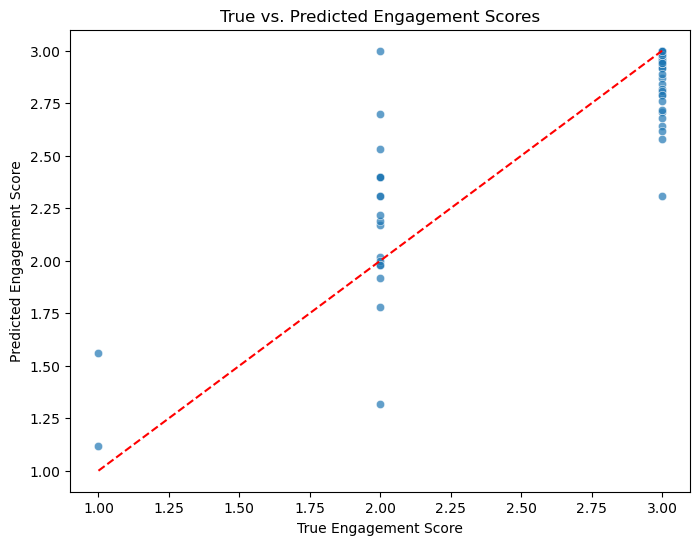

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([1, 3], [1, 3], color="red", linestyle="--")  # Reference line
plt.title("True vs. Predicted Engagement Scores")
plt.xlabel("True Engagement Score")
plt.ylabel("Predicted Engagement Score")
plt.show()

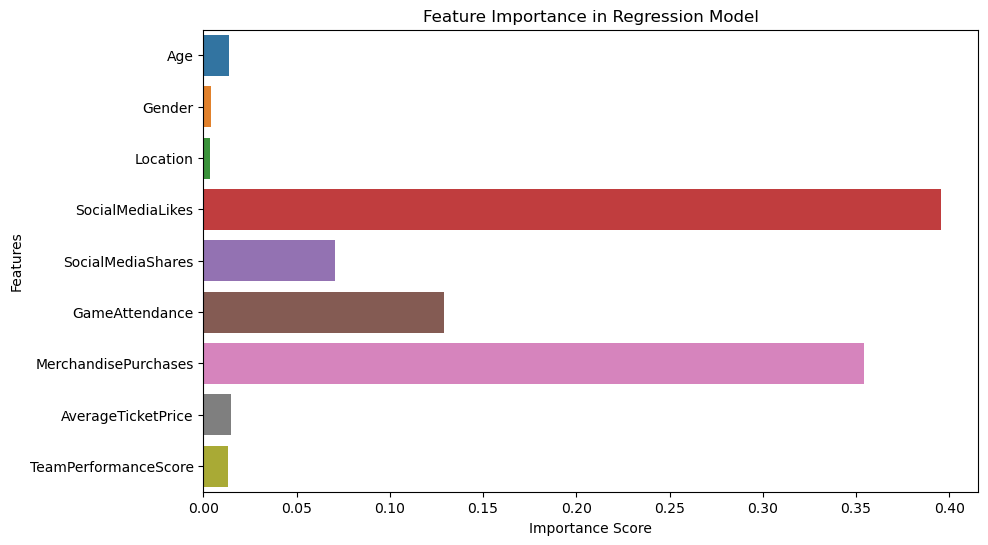

In [8]:
feature_importances = rf_regressor.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Regression Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
